In [114]:
import nltk
import requests
from bs4 import BeautifulSoup

In [115]:
from googletrans import Translator
translator = Translator()

Hacer Web Scraping sobre los siguientes links para obtener los diálogos de cada capítulo de la serie:
- https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/
- https://bigbangtrans.wordpress.com/series-1-episode-2-the-big-bran-hypothesis/
- https://bigbangtrans.wordpress.com/series-1-episode-3-the-fuzzy-boots-corollary/
- https://bigbangtrans.wordpress.com/series-1-episode-4-the-luminous-fish-effect/
- https://bigbangtrans.wordpress.com/series-1-episode-5-the-hamburger-postulate/


In [116]:
url = "https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/"

response = requests.get(url)
print(bool(response))
soup = BeautifulSoup(response.text, "html.parser")

True


In [117]:
di=soup.find_all("p",class_="MsoNormal")
diag=[i.text.strip() for i in di]
diag

['Scene: A corridor at a sperm bank.',
 'Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.',
 'Leonard: Agreed, what’s your point?',
 'Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.',
 'Leonard: Excuse me?',
 'Receptionist: Hang on.',
 'Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.',
 'Receptionist: Can I help you?',
 'Leonard: Yes. Um, is this the High IQ sperm bank?',
 'Receptionist: If you have to ask, maybe you shouldn’t be here.',
 'Sheldon: I think this is the place.',
 'Receptionist: Fill these out.',
 'Leonard: Thank-you. We’ll be right b

In [118]:
dialogos=[]
for i in range (1,6):
    url=f"https://bigbangtrans.wordpress.com/series-1-episode-{i}-pilot-episode/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    di=soup.find_all("p",class_="MsoNormal")
    diag=[i.text.strip() for i in di]
    dialogos.append(diag)

In [119]:
dialogos[0]

['Scene: A corridor at a sperm bank.',
 'Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.',
 'Leonard: Agreed, what’s your point?',
 'Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.',
 'Leonard: Excuse me?',
 'Receptionist: Hang on.',
 'Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.',
 'Receptionist: Can I help you?',
 'Leonard: Yes. Um, is this the High IQ sperm bank?',
 'Receptionist: If you have to ask, maybe you shouldn’t be here.',
 'Sheldon: I think this is the place.',
 'Receptionist: Fill these out.',
 'Leonard: Thank-you. We’ll be right b

Una vez que se obtuvieron los diálogos de cada capítulo, nos enfocaremos solamente en el primer capítulo.

In [120]:
dialogo1=dialogos[0]

El primer paso es separar los diálogos por personaje (Sheldon, Leonard, Penny, Raj, Howard). 

In [121]:
dialogo1[1]

'Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.'

In [122]:
sheldon=[]
leonard=[]
penny=[]
raj=[]
howard=[]
for i in range(len(dialogo1)):
    palabras=dialogo1[i].split(" ")
    
    if palabras[0]=="Sheldon:":
        sheldon.append(dialogo1[i])
    elif palabras[0]=="Leonard:":
        leonard.append(dialogo1[i])
    elif palabras[0]=="Penny:":
        penny.append(dialogo1[i])
    elif palabras[0]=="Howard:":
        howard.append(dialogo1[i])
    elif palabras[0]=="Raj:":
        raj.append(dialogo1[i])
        
        

In [123]:
sheldon

['Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.',
 'Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.',
 'Sheldon: I think this is the place.',
 'Sheldon: Leonard, I don’t think I can do this.',
 'Sheldon: No. We are committing genetic fraud. There’s no guarantee that our sperm is going to generate high IQ offspring, think about that. I have a sister with the same basic DNA mix who hostesses at Fuddruckers.',
 'Sheldon: I know, and I do yearn for faster downloads, but there’s some poor woman is going to pin her hopes on my sperm, what if she winds up with a toddler who doesn’t know if he should use an integral or a differential to solve the area under a curve.',
 'Sheldon: I wouldn’t.',
 'Sheldon: I want to leave.',
 'Sheld

Tokenizar cada dialogo por personaje

In [124]:
tokens=[]
lista=[sheldon,leonard,penny,raj,howard]
for i in lista:
    lista_temp=[]
    tokens.append(lista_temp)
    for j in range(len(i)):
        tok=nltk.word_tokenize(i[j],"english")
        lista_temp.append(tok)

 Eliminar stopwords y signos de puntuación (. , : ; ¡ ¿ ? …) de las listas de tokens

In [126]:
sheldon=tokens[0]
leonard=tokens[1]
penny=tokens[2]
raj=tokens[3]
howard=tokens[4]

In [136]:
sheldon_min=[]
for i in sheldon:
    for j in i:
        j=j.lower()
        sheldon_min.append(j)

leonard_min=[]
for i in leonard:
    for j in i:
        j=j.lower()
        leonard_min.append(j)

penny_min=[]
for i in penny:
    for j in i:
        j=j.lower()
        penny_min.append(j)

raj_min=[]
for i in raj:
    for j in i:
        j=j.lower()
        raj_min.append(j)

howard_min=[]
for i in howard:
    for j in i:
        j=j.lower()
        howard_min.append(j)


In [154]:
import nltk
palabras_funcionales=nltk.corpus.stopwords.words("english")
simbolos=[".",",",":",";","¡","¿","?","...",'’']
for i in simbolos:
    palabras_funcionales.append(i)

sheldon_limp=[]
for i in sheldon_min:
    if i not in palabras_funcionales:
        sheldon_limp.append(i)

leonard_limp=[]
for i in leonard_min:
    if i not in palabras_funcionales:
        leonard_limp.append(i)
penny_limp=[]
for i in penny_min:
    if i not in palabras_funcionales:
        penny_limp.append(i)
raj_limp=[]
for i in raj_min:
    if i not in palabras_funcionales:
        raj_limp.append(i)
howard_limp=[]
for i in howard_min:
    if i not in palabras_funcionales:
        howard_limp.append(i)

Encontrar la riqueza léxica de cada personaje

In [155]:
def riqueza_lexica(tokens): 
    tokens_conjunto=set(tokens)
    palabras_totales=len(tokens) 
    palabras_diferentes=len(tokens_conjunto)
    riqueza_lexica=palabras_diferentes/palabras_totales
    return riqueza_lexica

In [156]:
print("Sheldon: ",riqueza_lexica(sheldon_limp))
print("Leonard: ",riqueza_lexica(leonard_limp))
print("Penny: ",riqueza_lexica(penny_limp))
print("Raj: ",riqueza_lexica(raj_limp))
print("Howard: ",riqueza_lexica(howard_limp))    

Sheldon:  0.6465661641541038
Leonard:  0.5139318885448917
Penny:  0.5271565495207667
Raj:  0.6666666666666666
Howard:  0.8135593220338984


Encontrar las 5 palabras más utilizadas por cada personaje (hacer el lexical plot)

In [157]:
def mayoresPalabras(numMaximo, tokens):
    setTokens = set(tokens)
    dic = dict()
    for tok in setTokens:
        dic[tok] = tokens.count(tok)
    k={k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}
    return list(k)[0:numMaximo]

In [159]:
print("Sheldon: ",mayoresPalabras(5,sheldon_limp))
print("Leonard: ",mayoresPalabras(5,leonard_limp))
print("Penny: ",mayoresPalabras(5,penny_limp))
print("Raj: ",mayoresPalabras(5,raj_limp))
print("Howard: ",mayoresPalabras(5,howard_limp))

Sheldon:  ['sheldon', 'think', 'going', 'yes', 'leonard']
Leonard:  ['leonard', 'well', 'sheldon', 'good', 'uh']
Penny:  ['penny', 'oh', 'okay', 'hi', 'really']
Raj:  ['raj', 'smooth', 'fantastic', 'unbelievable']
Howard:  ['howard', 'back', 'quest', 'coitus', 'hang']


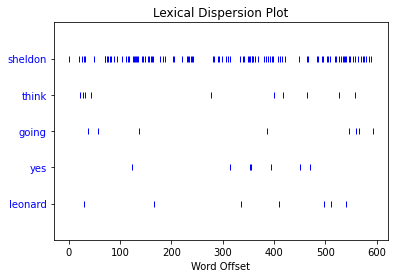

In [163]:
texto_nltk=nltk.Text(sheldon_limp) 
texto_nltk.dispersion_plot(['sheldon', 'think', 'going', 'yes', 'leonard'])

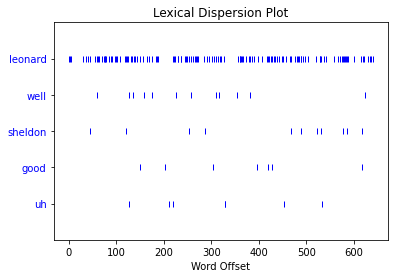

In [164]:
texto_nltk=nltk.Text(leonard_limp)
texto_nltk.dispersion_plot(['leonard', 'well', 'sheldon', 'good', 'uh'])

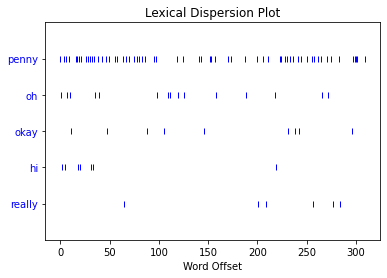

In [165]:
texto_nltk=nltk.Text(penny_limp)
texto_nltk.dispersion_plot(['penny', 'oh', 'okay', 'hi', 'really'])

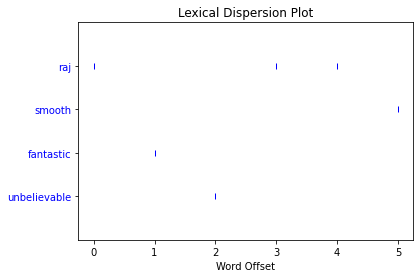

In [166]:
texto_nltk=nltk.Text(raj_limp)
texto_nltk.dispersion_plot(['raj', 'smooth', 'fantastic', 'unbelievable'])

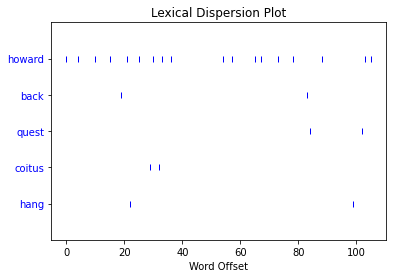

In [167]:
texto_nltk=nltk.Text(howard_limp)
texto_nltk.dispersion_plot(['howard', 'back', 'quest', 'coitus', 'hang'])

In [179]:
texto_nltk

<Text: howard wait till see howard stephen hawking lecture...>

Encontrar palabras similares para la palabra más utilizada de cada personaje

In [184]:
type(sheldon_limp)

list

In [185]:
save = [ ]
for word in nltk.word_tokenize("think"):
    save.append(nltk.text.ContextIndex(sheldon_limp).similar_words(word))
save

[['lady']]

In [194]:
save = [ ]
for word in nltk.word_tokenize("well"):
    save.append(nltk.text.ContextIndex(leonard_limp).similar_words(word))
save

[[]]

In [192]:
palabras=["think","well","okay","fantastic","back"]
tokens=[sheldon_limp,leonard_limp,penny_limp,raj_limp,howard_limp]
save=[ ]
for palabra in palabras:
    for token in tokens:
        save_temp =[ ]
        save.append(save_temp)
        for word in nltk.word_tokenize(i):
            save.append(nltk.text.ContextIndex(token).similar_words(word))

In [193]:
save

[[],
 ['lady'],
 [],
 ['leonard', 'thank'],
 [],
 [],
 [],
 [],
 [],
 ['see-ka-tong-guay-jow'],
 [],
 ['lady'],
 [],
 ['leonard', 'thank'],
 [],
 [],
 [],
 [],
 [],
 ['see-ka-tong-guay-jow'],
 [],
 ['lady'],
 [],
 ['leonard', 'thank'],
 [],
 [],
 [],
 [],
 [],
 ['see-ka-tong-guay-jow'],
 [],
 ['lady'],
 [],
 ['leonard', 'thank'],
 [],
 [],
 [],
 [],
 [],
 ['see-ka-tong-guay-jow'],
 [],
 ['lady'],
 [],
 ['leonard', 'thank'],
 [],
 [],
 [],
 [],
 [],
 ['see-ka-tong-guay-jow']]

Encontrar hápax de cada personaje

In [200]:
for j in tokens:
    texto_nltk=nltk.Text(j) 
    distribucion=nltk.FreqDist(texto_nltk)
    hapaxes=distribucion.hapaxes() 
    for i in range (3):
        print(hapaxes[i])
        print('*******************************')

photon
*******************************
directed
*******************************
either
*******************************
agreed
*******************************
point
*******************************
aegean
*******************************
well
*******************************
guess
*******************************
new
*******************************
fantastic
*******************************
unbelievable
*******************************
smooth
*******************************
wait
*******************************
till
*******************************
see
*******************************


Utilizar la función nltk.FreqDist() para mostrar en una gráfica las 20 palabras que más se utilizan

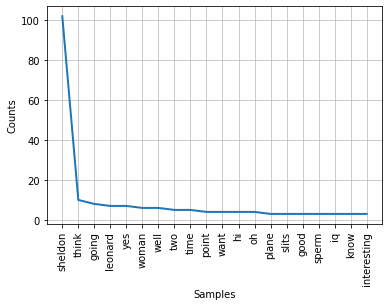

In [198]:
nltk.FreqDist(nltk.Text(sheldon_limp)).plot(20)

Mostrar en un Dataframe la siguiente información

In [208]:
import pandas as pd
riquezas=[0.646,0.513,0.527,0.666,0.813]
palabras=["think","well","okay","fantastic","back"]
hapax=[['photon', 'directed', 'eight'],
      ['agreed','point','aegean'],
      ['well','guess','nex'],
      ['unbelievable','fantastic','smooth'],
      ['wait','till','see']]
df=pd.DataFrame(columns=["Sheldon","Leonard","Penny","Raj","Howard"],
               index=["riquezas","palabras","hapax"])

df.loc["riquezas"]=riquezas
df.loc["palabras"]=palabras
df.loc["hapax"]=hapax
df

,Sheldon,Leonard,Penny,Raj,Howard
riquezas,0.646,0.513,0.527,0.666,0.813
palabras,think,well,okay,fantastic,back
hapax,"[photon, directed, eight]","[agreed, point, aegean]","[well, guess, nex]","[unbelievable, fantastic, smooth]","[wait, till, see]"
